**#Topic**

In this project, many of us believed if we have a univeristy certificate, we will get a high - paying job. I will be researching if my statement is true

In [1]:
import matplotlib.pyplot as plt
import pandas as pd




Below are pre requisite functions i have set to ensure clean, smooth and readable code. As most of the steps required are repeated (e.g. university excel has 5 sheets of different univeristy with the same catergories), i have turned them into functions instead.

In [2]:
#a simple function to allow the FULL dataframe to be displayed
def readCSV(csvFile):
    dataFrame = pd.read_csv(csvFile)
    pd.set_option('display.max_rows',None)
    return dataFrame


#a function to add back the header and remove the extra spacing
def UniAddColumnsAndRemoveSpace(UniDF):
#Set headers for the columns
    UniDF.columns = ["RemoveColumn","Degree","Employed(%)","Full-Time Permanent Employment(%)","Basic Monthly Salary Mean (SGD)","Basic Monthly Salary Median (SGD)",
"Gross Monthly Salary Mean (SGD)","Gross Monthly Salary Median (SGD)","Gross Monthly Salary 25th Percentile (SGD)","Gross Monthly Salary 75th Percentile (SGD)"]
# #Remove the empty column
    UniDF=UniDF.drop(labels="RemoveColumn",axis=1)
    return UniDF


#A function to remove any NAN values and convert the decimal points of 2 columns back into percentages
def UniRemoveNANAndConvertToPercentage(UniDF):
    #Remove all rows and columns with the NAN values
    UniDF = UniDF.dropna()
#Reset the index and then drop it to prevent 2 duplicate values
    UniDF= UniDF.reset_index()
    UniDF=UniDF.drop(columns='index')
#Convert the 2 columns to float
    UniDF = UniDF.astype({'Employed(%)':'float','Full-Time Permanent Employment(%)':'float'})

#Multiply the column values with 100 and round it to 1 d.p
    UniDF['Employed(%)'] = 100 * UniDF['Employed(%)']
    UniDF['Full-Time Permanent Employment(%)'] = 100 * UniDF['Full-Time Permanent Employment(%)']
#Round the values into 1 d.p. for percentages
    UniDF['Employed(%)'] = UniDF['Employed(%)'].round(decimals = 1)
    UniDF['Full-Time Permanent Employment(%)'] = UniDF['Full-Time Permanent Employment(%)'].round(decimals = 1)
#Remove the extra numbers behind the degree column values
    UniDF['Degree'] = UniDF['Degree'].str.replace('\d+', '',regex= True)
    return UniDF

#A function to convery Uni salary and employment to float and round the percentages to 1 d.p.
def UniconvertToFloat(UniDF):
    UniDF['Gross Monthly Salary Median (SGD)'] = UniDF['Gross Monthly Salary Median (SGD)'].astype(float)
    UniDF['Employed(%)'] = UniDF['Employed(%)'].astype(float)
    UniDF['Gross Monthly Salary Median (SGD)'] = UniDF['Gross Monthly Salary Median (SGD)']
    UniDF['Employed(%)'] = UniDF['Employed(%)'].round(decimals = 1)
    return UniDF
    
#A function to convert ITE and Poly Salary to float

def PolyITEconvertToFloat(PolyITEdf):
    PolyITEdf['Fresh Graduates Median Gross Monthly Starting Salary (SGD)'] = PolyITEdf['Fresh Graduates Median Gross Monthly Starting Salary (SGD)'].astype(float)
    PolyITEdf['Post-NS Graduates Median Gross Monthly Starting Salary (SGD)'] = PolyITEdf['Post-NS Graduates Median Gross Monthly Starting Salary (SGD)'].astype(float)
    PolyITEdf['Fresh Graduates Employment Proportion(%)'] = PolyITEdf['Fresh Graduates Employment Proportion(%)'].astype(float)
    PolyITEdf['Post-NS Graduates Employment Proportion(%)'] = PolyITEdf['Post-NS Graduates Employment Proportion(%)'].astype(float)

   



#A function to save any of the cleaning done to CSV file
def cleantoCSV(UniDF,csvFile):
    UniDF.to_csv(csvFile,index=None)

#Converts the value s in polytechnic and ITE excel file to zero. As quoted from MOM, s represents data suppressed due to small number of observations, 
# as such i will be changing the value to zero

def covertStoZero(df,column):
    df[column] = df[column].replace(['s'],'0')

#A functions to convert the 2 columns into float and times it by 100 due to perecentage, followed by rounded it 1 d.p. This has to be done as the values become inaccruate when 
#times by 100

def PolyconvertToFloatAndTimes(df):
    df['Fresh Graduates Employment Proportion(%)'] = df['Fresh Graduates Employment Proportion(%)'].astype(float)
    df['Post-NS Graduates Employment Proportion(%)'] = df['Post-NS Graduates Employment Proportion(%)'].astype(float)
    df['Fresh Graduates Employment Proportion(%)'] = df['Fresh Graduates Employment Proportion(%)'] * 100
    df['Post-NS Graduates Employment Proportion(%)'] =  df['Post-NS Graduates Employment Proportion(%)'] * 100
    df['Fresh Graduates Employment Proportion(%)'] = df['Fresh Graduates Employment Proportion(%)'].round(decimals = 1)
    df['Post-NS Graduates Employment Proportion(%)'] = df['Post-NS Graduates Employment Proportion(%)'].round(decimals = 1)


    






    
    


The below sections are to take the excel (untouched data recieved from the offical website) ,convert it into a csv file, clean it (by removing unwanted texts,numbers and spaces), save it as a new csv file with the cleaned data and finally display out the new dataframe of each University.

In [3]:

#This section is to convert, clean and display out the new dataframe of Univeristy NUS 


#Read Excel file with sheet name = NUS
read_file = pd.read_excel("Univeristy_Graduates_Employment_Rate_Monthly_Salary_2021.xlsx",sheet_name="NUS")
#Convert excel to csv without indexes
read_file.to_csv("Nus_Graduates_Employment_Rate_Monthly_Salary_2021.csv",index=None)


#Getting the data and storing it in UniDFNUS
UniDfNUS = readCSV("Nus_Graduates_Employment_Rate_Monthly_Salary_2021.csv")

#Calling the function
UniDfNUS = UniAddColumnsAndRemoveSpace(UniDfNUS)

#Remove the Row with values n.a., this has to be done has n.a. cannot be convert to float and thus the function below will not work
UniDfNUS=UniDfNUS.drop(UniDfNUS[UniDfNUS['Degree']=="Bachelor of Medicine and Bachelor of Surgery6**"].index)

#Calling the function to remove nan and convert 2 columns to percentages
UniDfNUS = UniRemoveNANAndConvertToPercentage(UniDfNUS)

cleantoCSV(UniDfNUS , "Nus_Graduates_Employment_Rate_Monthly_Salary_2021.csv" )

display(UniDfNUS)










,Degree,Employed(%),Full-Time Permanent Employment(%),Basic Monthly Salary Mean (SGD),Basic Monthly Salary Median (SGD),Gross Monthly Salary Mean (SGD),Gross Monthly Salary Median (SGD),Gross Monthly Salary 25th Percentile (SGD),Gross Monthly Salary 75th Percentile (SGD)
0,Bachelor of Arts,91.4,70.0,3405,3200,3600,3200,2850,4100
1,Bachelor of Arts (Hons),88.8,68.3,3619,3500,3731,3650,3400,3983
2,Bachelor of Social Sciences,92.5,78.2,3757,3531,3850,3600,3400,4100
3,Bachelor of Dental Surgery,100.0,100.0,4256,4200,4286,4200,4200,4600
4,Bachelor of Engineering (Biomedical Engineering),94.4,83.3,3610,3500,3732,3600,3300,4000
5,Bachelor of Engineering (Chemical Engineering),91.4,84.8,3793,3700,4023,3800,3600,4300
6,Bachelor of Engineering (Civil Engineering),97.3,97.3,3780,3700,3897,3700,3500,4100
7,Bachelor of Engineering (Electrical Engineering),95.1,93.0,4251,4000,4377,4150,3900,4550
8,Bachelor of Engineering (Engineering Science)*,89.5,68.4,4189,4500,4399,4500,4000,4900
9,Bachelor of Engineering (Environmental Enginee...,97.1,88.6,3572,3500,3607,3500,3300,3900


In [4]:
#This section is to convert, clean and display out the new dataframe of Univeristy NTU

#Read Excel file with sheet name = NUS
read_file = pd.read_excel("Univeristy_Graduates_Employment_Rate_Monthly_Salary_2021.xlsx",sheet_name="NTU")
#Convert excel to csv without indexes
read_file.to_csv("NTU_Graduates_Employment_Rate_Monthly_Salary_2021.csv",index=None)

#Getting the data and storing it in UniDFNUS
UniDfNTU = readCSV("NTU_Graduates_Employment_Rate_Monthly_Salary_2021.csv")

#Calling the function
UniDfNTU = UniAddColumnsAndRemoveSpace(UniDfNTU)

#Calling the function to remove nan and convert 2 columns to percentages
UniDfNTU = UniRemoveNANAndConvertToPercentage(UniDfNTU)

cleantoCSV(UniDfNTU , "NTU_Graduates_Employment_Rate_Monthly_Salary_2021.csv" )

display(UniDfNTU)









,Degree,Employed(%),Full-Time Permanent Employment(%),Basic Monthly Salary Mean (SGD),Basic Monthly Salary Median (SGD),Gross Monthly Salary Mean (SGD),Gross Monthly Salary Median (SGD),Gross Monthly Salary 25th Percentile (SGD),Gross Monthly Salary 75th Percentile (SGD)
0,Accountancy,97.7,93.0,3505,3300,3539,3400,3100,3500
1,Accountancy and Business,99.2,96.2,5018,4500,5173,4500,3700,5858
2,Business,96.2,85.2,4211,4000,4362,4000,3500,4800
3,Double Degree in Business and Computer Enginee...,93.8,87.5,6418,6300,6578,6300,5250,8225
4,Aerospace Engineering,94.4,87.3,4250,4250,4321,4471,3792,5000
5,Bioengineering,90.9,75.8,3480,3483,3654,3500,3300,3850
6,Chemical and Biomolecular Engineering,91.1,84.8,3784,3600,3959,3740,3600,4300
7,Civil Engineering,97.7,92.0,3596,3500,3664,3540,3400,3800
8,Computer Engineering,95.8,89.6,4649,4500,4847,4500,4000,5000
9,Computer Science,97.0,91.0,4871,4800,4924,4800,4200,5450


In [5]:
#This section is to convert, clean and display out the new dataframe of Univeristy SMU

#Read Excel file with sheet name = NUS
read_file = pd.read_excel("Univeristy_Graduates_Employment_Rate_Monthly_Salary_2021.xlsx",sheet_name="SMU")
#Convert excel to csv without indexes
read_file.to_csv("SMU_Graduates_Employment_Rate_Monthly_Salary_2021.csv",index=None)

#Getting the data and storing it in UniDFNUS
UniDfSMU = readCSV("SMU_Graduates_Employment_Rate_Monthly_Salary_2021.csv")

#Calling the function
UniDfSMU = UniAddColumnsAndRemoveSpace(UniDfSMU)


#Calling the function to remove nan and convert 2 columns to percentages
UniDfSMU = UniRemoveNANAndConvertToPercentage(UniDfSMU)



cleantoCSV(UniDfSMU , "SMU_Graduates_Employment_Rate_Monthly_Salary_2021.csv" )


display(UniDfSMU)


,Degree,Employed(%),Full-Time Permanent Employment(%),Basic Monthly Salary Mean (SGD),Basic Monthly Salary Median (SGD),Gross Monthly Salary Mean (SGD),Gross Monthly Salary Median (SGD),Gross Monthly Salary 25th Percentile (SGD),Gross Monthly Salary 75th Percentile (SGD)
0,Accountancy,98.7,93.0,3751,3400,3814,3400,3200,4000
1,Cum Laude and above,97.9,92.6,4161,3700,4213,3850,3300,4600
2,Business Management,96.6,86.0,4229,4000,4371,4000,3500,4650
3,Cum Laude and above,96.6,90.3,4705,4333,4855,4480,3800,5043
4,Economics,91.8,83.5,4641,4275,4777,4435,3800,5250
5,Cum Laude and above,94.1,91.2,5209,4750,5310,4900,4191,5810
6,Information Systems,98.2,94.6,4774,4860,4906,5000,4200,5350
7,Cum Laude and above,97.4,93.6,5317,5050,5499,5350,5000,5833
8,Social Sciences,94.1,77.1,3656,3465,3836,3600,3200,4010
9,Cum Laude and above,96.9,86.2,3856,3500,4063,3763,3350,4500


In [6]:
#This section is to convert, clean and display out the new dataframe of Univeristy SUTD

#Read Excel file with sheet name = NUS
read_file = pd.read_excel("Univeristy_Graduates_Employment_Rate_Monthly_Salary_2021.xlsx",sheet_name="SUTD")
#Convert excel to csv without indexes
read_file.to_csv("SUTD_Graduates_Employment_Rate_Monthly_Salary_2021.csv",index=None)

#Getting the data and storing it in UniDFNUS
UniDfSUTD = readCSV("SUTD_Graduates_Employment_Rate_Monthly_Salary_2021.csv")

#Calling the function
UniDfSUTD = UniAddColumnsAndRemoveSpace(UniDfSUTD)


#Calling the function to remove nan and convert 2 columns to percentages
UniDfSUTD = UniRemoveNANAndConvertToPercentage(UniDfSUTD)



cleantoCSV(UniDfSUTD , "SUTD_Graduates_Employment_Rate_Monthly_Salary_2021.csv" )


display(UniDfSUTD)


,Degree,Employed(%),Full-Time Permanent Employment(%),Basic Monthly Salary Mean (SGD),Basic Monthly Salary Median (SGD),Gross Monthly Salary Mean (SGD),Gross Monthly Salary Median (SGD),Gross Monthly Salary 25th Percentile (SGD),Gross Monthly Salary 75th Percentile (SGD)
0,Bachelor of Engineering (Computer Science and ...,98.3,96.7,4936,4800,5030,4800,4400,5414
1,Bachelor of Engineering (Engineering Product D...,89.9,85.5,4047,4000,4141,4000,3750,4500
2,Bachelor of Engineering (Engineering Systems a...,95.5,90.9,4542,4500,4778,4700,3900,5000
3,Bachelor of Science (Architecture and Sustaina...,96.6,89.7,3800,3801,3842,3875,3430,4200


In [7]:
#This section is to convert, clean and display out the new dataframe of Univeristy SUSS

#Read Excel file with sheet name = NUS
read_file = pd.read_excel("Univeristy_Graduates_Employment_Rate_Monthly_Salary_2021.xlsx",sheet_name="SUSS")
#Convert excel to csv without indexes
read_file.to_csv("SUSS_Graduates_Employment_Rate_Monthly_Salary_2021.csv",index=None)

#Getting the data and storing it in UniDFNUS
UniDfSUSS = readCSV("SUSS_Graduates_Employment_Rate_Monthly_Salary_2021.csv")

#Calling the function
UniDfSUSS = UniAddColumnsAndRemoveSpace(UniDfSUSS)


#Calling the function to remove nan and convert 2 columns to percentages
UniDfSUSS = UniRemoveNANAndConvertToPercentage(UniDfSUSS)



cleantoCSV(UniDfSUSS , "SUSS_Graduates_Employment_Rate_Monthly_Salary_2021.csv" )



display(UniDfSUSS)

,Degree,Employed(%),Full-Time Permanent Employment(%),Basic Monthly Salary Mean (SGD),Basic Monthly Salary Median (SGD),Gross Monthly Salary Mean (SGD),Gross Monthly Salary Median (SGD),Gross Monthly Salary 25th Percentile (SGD),Gross Monthly Salary 75th Percentile (SGD)
0,Bachelor of Early Childhood Education,93.0,88.4,2949,3000,2963,3000,2800,3100
1,Bachelor of Human Resource Management,95.6,80.9,3249,3200,3412,3200,3000,3500
2,Bachelor of Social Work,94.7,86.8,3432,3530,3461,3530,3400,3580
3,Bachelor of Accountancy,98.6,89.0,3199,3200,3231,3200,3000,3400
4,Bachelor of Science in Business Analytics,93.5,83.9,4218,3800,4372,3800,3350,4900
5,Bachelor of Science in Finance,84.4,56.3,3856,3500,3862,3500,3300,4350
6,Bachelor of Science in Marketing,92.4,63.6,3303,3200,3411,3275,2820,3600
7,Bachelor of Science in Supply Chain Management,97.4,79.5,3245,3200,3381,3300,3025,3500


In [8]:
#This section is to convert, clean and display out the new dataframe of Univeristy SIT

#Read Excel file with sheet name = NUS
read_file = pd.read_excel("Univeristy_Graduates_Employment_Rate_Monthly_Salary_2021.xlsx",sheet_name="SIT")
#Convert excel to csv without indexes
read_file.to_csv("SIT_Graduates_Employment_Rate_Monthly_Salary_2021.csv",index=None)

#Getting the data and storing it in UniDFNUS
UniDfSIT = readCSV("SIT_Graduates_Employment_Rate_Monthly_Salary_2021.csv")

#Calling the function
UniDfSIT = UniAddColumnsAndRemoveSpace(UniDfSIT)


#Calling the function to remove nan and convert 2 columns to percentages
UniDfSIT = UniRemoveNANAndConvertToPercentage(UniDfSIT)


cleantoCSV(UniDfSIT , "SIT_Graduates_Employment_Rate_Monthly_Salary_2021.csv" )





display(UniDfSIT)

,Degree,Employed(%),Full-Time Permanent Employment(%),Basic Monthly Salary Mean (SGD),Basic Monthly Salary Median (SGD),Gross Monthly Salary Mean (SGD),Gross Monthly Salary Median (SGD),Gross Monthly Salary 25th Percentile (SGD),Gross Monthly Salary 75th Percentile (SGD)
0,Bachelor of Arts in Game Design*,100.0,78.6,3486,3500,3575,3500,3100,3600
1,Bachelor of Fine Arts in Digital Art and Anima...,97.1,70.6,2845,2835,2862,2887,2675,3000
2,Bachelor of Science in Computer Science and Ga...,97.7,81.8,3960,4000,3974,4000,3500,4200
3,Bachelor of Science in Computer Science in Rea...,97.6,90.5,4390,4200,4399,4200,3880,4500
4,Bachelor of Accountancy with Honours,97.4,69.8,3107,3000,3120,3000,3000,3200
5,Bachelor of Engineering with Honours in Inform...,100.0,95.9,4023,4000,4237,4300,3600,4630
6,Bachelor of Engineering with Honours in Inform...,96.2,83.0,4275,4000,4366,4000,3600,4750
7,Bachelor of Engineering with Honours in Pharma...,94.2,73.9,3329,3375,3749,3740,3400,4000
8,Bachelor of Engineering with Honours in Sustai...,98.1,84.6,3585,3500,3702,3500,3375,3800
9,Bachelor of Engineering with Honours in Sustai...,97.1,77.1,3823,3925,4203,4105,3650,4370


The below sections are to take the excel (untouched data recieved from the offical website) ,convert it into a csv file, clean it (by removing unwanted texts,numbers and spaces), save it as a new csv file with the cleaned data and finally display out the new dataframe of the polytechnic and ITE

In [9]:
#This section is to convert, clean and display out the new dataframe of Polytechnics

#Read Excel file 
read_file = pd.read_excel("Polytechnics_Graduates_Employment_Rate_Monthly_Salary_2021.xlsx")
#Convert excel to csv without indexes
read_file.to_csv("Polytechnics_Graduates_Employment_Rate_Monthly_Salary_2021.csv",index=None)

#Getting the data and storing it in UniDFNUS
PolyDF = readCSV("Polytechnics_Graduates_Employment_Rate_Monthly_Salary_2021.csv")

#Set headers for the columns
PolyDF.columns = ["RemoveColumn","Courses","Polytechnics conducting the courses","Fresh Graduates Employment Number","Fresh Graduates Employment Proportion(%)",
"Fresh Graduates Median Gross Monthly Starting Salary (SGD)","Post-NS Graduates Employment Number","Post-NS Graduates Employment Proportion(%)",
"Post-NS Graduates Median Gross Monthly Starting Salary (SGD)"]
# #Remove the empty column
PolyDF=PolyDF.drop(labels="RemoveColumn",axis=1)
#Remove all rows and columns with the NAN values
PolyDF = PolyDF.dropna()
#Reset the index and then drop it to prevent 2 duplicate values
PolyDF= PolyDF.reset_index()
PolyDF=PolyDF.drop(columns='index')

#Changes the value of s in the data into 0

covertStoZero(PolyDF,'Fresh Graduates Employment Number')
covertStoZero(PolyDF,'Fresh Graduates Employment Proportion(%)')
covertStoZero(PolyDF,'Fresh Graduates Median Gross Monthly Starting Salary (SGD)')
covertStoZero(PolyDF,'Post-NS Graduates Employment Number')
covertStoZero(PolyDF,'Post-NS Graduates Employment Proportion(%)')
covertStoZero(PolyDF,'Post-NS Graduates Median Gross Monthly Starting Salary (SGD)')

PolyconvertToFloatAndTimes(PolyDF)



cleantoCSV(PolyDF , "Polytechnics_Graduates_Employment_Rate_Monthly_Salary_2021.csv")



display(PolyDF)

,Courses,Polytechnics conducting the courses,Fresh Graduates Employment Number,Fresh Graduates Employment Proportion(%),Fresh Graduates Median Gross Monthly Starting Salary (SGD),Post-NS Graduates Employment Number,Post-NS Graduates Employment Proportion(%),Post-NS Graduates Median Gross Monthly Starting Salary (SGD)
0,Total,All Polys,3022,56.0,2400,1374,63.3,2614
1,Aeronautical & Aerospace Technology; Aeronauti...,"NYP,NP,RP,SP,TP",44,66.7,2449,52,65.0,2874
2,Aerospace Avionics; Aerospace Electronics; A...,"NYP,NP,RP,SP,TP",31,58.5,2300,55,73.3,2550
3,Automation & Mechatronic Systems; Mechatronics...,"NYP,NP,SP,TP",43,64.2,2500,77,70.0,2600
4,Business Process & Systems Engineering; Indust...,"RP,TP",34,55.7,2250,0,0.0,0
5,Computer Engineering; Electronics; Electronic ...,"NYP,NP,TP, RP",99,76.2,2400,89,68.5,2675
6,Electrical & Electronic Engineering; Electrica...,"NYP,NP,SP",44,68.8,2450,62,78.5,2700
7,Mechanical Engineering,"NP,SP",33,63.5,2430,43,74.1,2661
8,Green Building Energy Management; Green Buildi...,"RP,TP",0,0.0,0,32,76.2,2550
9,Hotel & Leisure Facilities Management; Integra...,"NP,SP,TP",41,61.2,2400,0,0.0,0


In [10]:
#This section is to convert, clean and display out the new dataframe of ITE

#Read Excel file 
read_file = pd.read_excel("ITE_Graduates_Employment_Rate_Monthly_Salary_2021.xlsx")
#Convert excel to csv without indexes
read_file.to_csv("ITE_Graduates_Employment_Rate_Monthly_Salary_2021.csv",index=None)

#Getting the data and storing it in UniDFNUS
ITEdf = readCSV("ITE_Graduates_Employment_Rate_Monthly_Salary_2021.csv")

#Set headers for the columns
ITEdf.columns = ["RemoveColumn","Courses","Fresh Graduates Employment Number","Fresh Graduates Employment Proportion(%)",
"Fresh Graduates Median Gross Monthly Starting Salary (SGD)","Post-NS Graduates Employment Number","Post-NS Graduates Employment Proportion(%)",
"Post-NS Graduates Median Gross Monthly Starting Salary (SGD)"]
# #Remove the empty column
ITEdf=ITEdf.drop(labels="RemoveColumn",axis=1)
#Remove all rows and columns with the NAN values
ITEdf = ITEdf.dropna()
#Reset the index and then drop it to prevent 2 duplicate values
ITEdf= ITEdf.reset_index()
ITEdf=ITEdf.drop(columns='index')

#Changes the value of s in the data into 0

covertStoZero(ITEdf,'Fresh Graduates Employment Number')
covertStoZero(ITEdf,'Fresh Graduates Employment Proportion(%)')
covertStoZero(ITEdf,'Fresh Graduates Median Gross Monthly Starting Salary (SGD)')
covertStoZero(ITEdf,'Post-NS Graduates Employment Number')
covertStoZero(ITEdf,'Post-NS Graduates Employment Proportion(%)')
covertStoZero(ITEdf,'Post-NS Graduates Median Gross Monthly Starting Salary (SGD)')



cleantoCSV(ITEdf , "ITE_Graduates_Employment_Rate_Monthly_Salary_2021.csv")



display(ITEdf)

,Courses,Fresh Graduates Employment Number,Fresh Graduates Employment Proportion(%),Fresh Graduates Median Gross Monthly Starting Salary (SGD),Post-NS Graduates Employment Number,Post-NS Graduates Employment Proportion(%),Post-NS Graduates Median Gross Monthly Starting Salary (SGD)
0,Higher Nitec (Engineering),97,23.2,1814,188,74,2300
1,Electronics Engineering,0,0,0,35,67.3,2350
2,Higher Nitec (Business & Services),169,26.7,1800,92,68.1,2360
3,Higher Nitec (Info & Communications Technology),34,21.3,1800,44,55,2000
4,Nitec (Engineering),53,18.2,1800,172,59.3,2100
5,Nitec (Business & Services),215,27.9,1800,71,62.8,2100
6,Nursing,68,41.2,1900,0,0,0
7,Nitec (Info & Communications Technology),0,0,0,36,52.9,2050


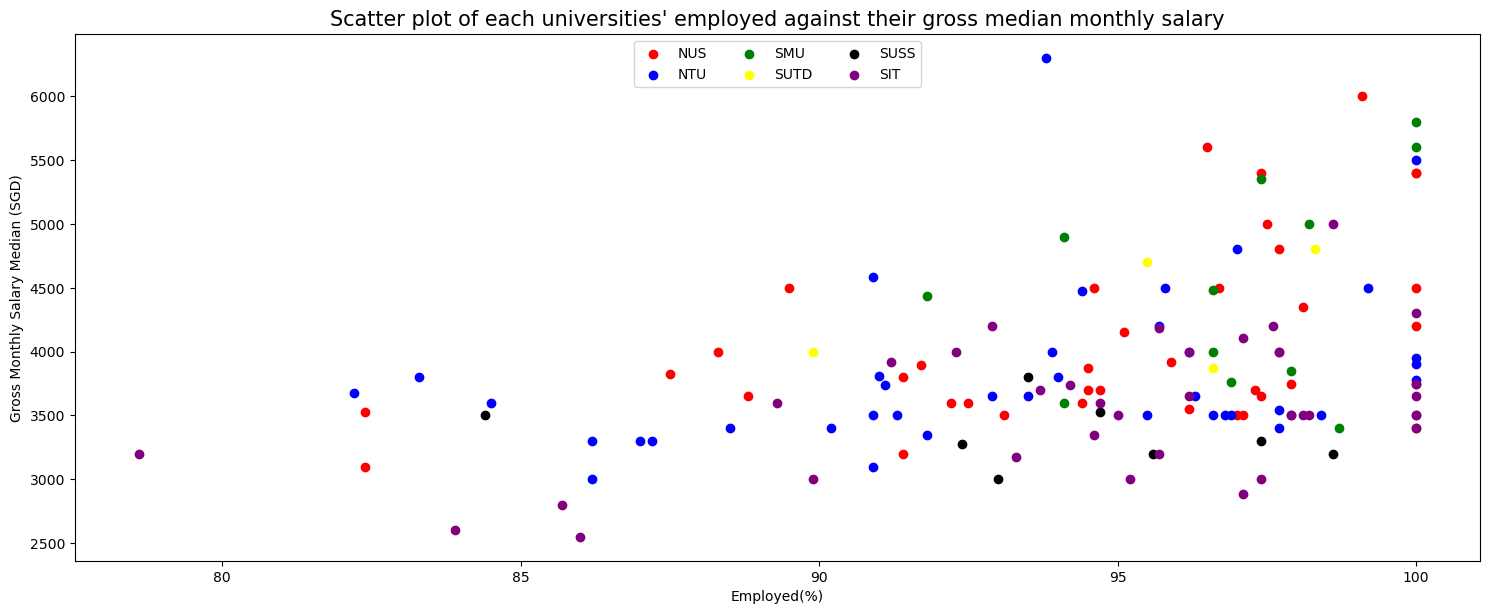

In [11]:
UniconvertToFloat(UniDfNUS)
UniconvertToFloat(UniDfNTU)
UniconvertToFloat(UniDfSMU)
UniconvertToFloat(UniDfSUTD)
UniconvertToFloat(UniDfSUSS)
UniconvertToFloat(UniDfSIT)


NUSEmploy = UniDfNUS['Employed(%)'].values
NTUEmploy = UniDfNTU['Employed(%)'].values
SMUEmploy = UniDfSMU['Employed(%)'].values
SUTDEmploy = UniDfSUTD['Employed(%)'].values
SUSSEmploy = UniDfSUSS['Employed(%)'].values
SITEmploy = UniDfSIT['Employed(%)'].values

NUSSalary = UniDfNUS['Gross Monthly Salary Median (SGD)'].values
NTUSalary = UniDfNTU['Gross Monthly Salary Median (SGD)'].values
SMUSalary = UniDfSMU['Gross Monthly Salary Median (SGD)'].values
SUTDSalary = UniDfSUTD['Gross Monthly Salary Median (SGD)'].values
SUSSSalary = UniDfSUSS['Gross Monthly Salary Median (SGD)'].values
SITSalary = UniDfSIT['Gross Monthly Salary Median (SGD)'].values



plt.figure(figsize = (15,6))

plt.scatter(NUSEmploy,NUSSalary,color="red",label="NUS")
plt.scatter(NTUEmploy,NTUSalary,color="blue",label="NTU")
plt.scatter(SMUEmploy,SMUSalary,color="green",label="SMU")
plt.scatter(SUTDEmploy,SUTDSalary,color="yellow",label="SUTD")
plt.scatter(SUSSEmploy,SUSSSalary,color="black",label="SUSS")
plt.scatter(SITEmploy,SITSalary,color="purple",label="SIT")
plt.legend(loc ='upper center',bbox_to_anchor=(0.5,1), fancybox= True,ncol = 3)
plt.xlabel("Employed(%)")
plt.ylabel("Gross Monthly Salary Median (SGD)")
plt.tight_layout()

plt.title("Scatter plot of each universities' employed against their gross median monthly salary", fontsize= 15)
plt.show()



The graph above shows that people who graduated from Singapore Universities have a positive correlation. Most people are employed at 90% rate have a monthly gross salary median of about 3500 SGD to 4500 SGD. 

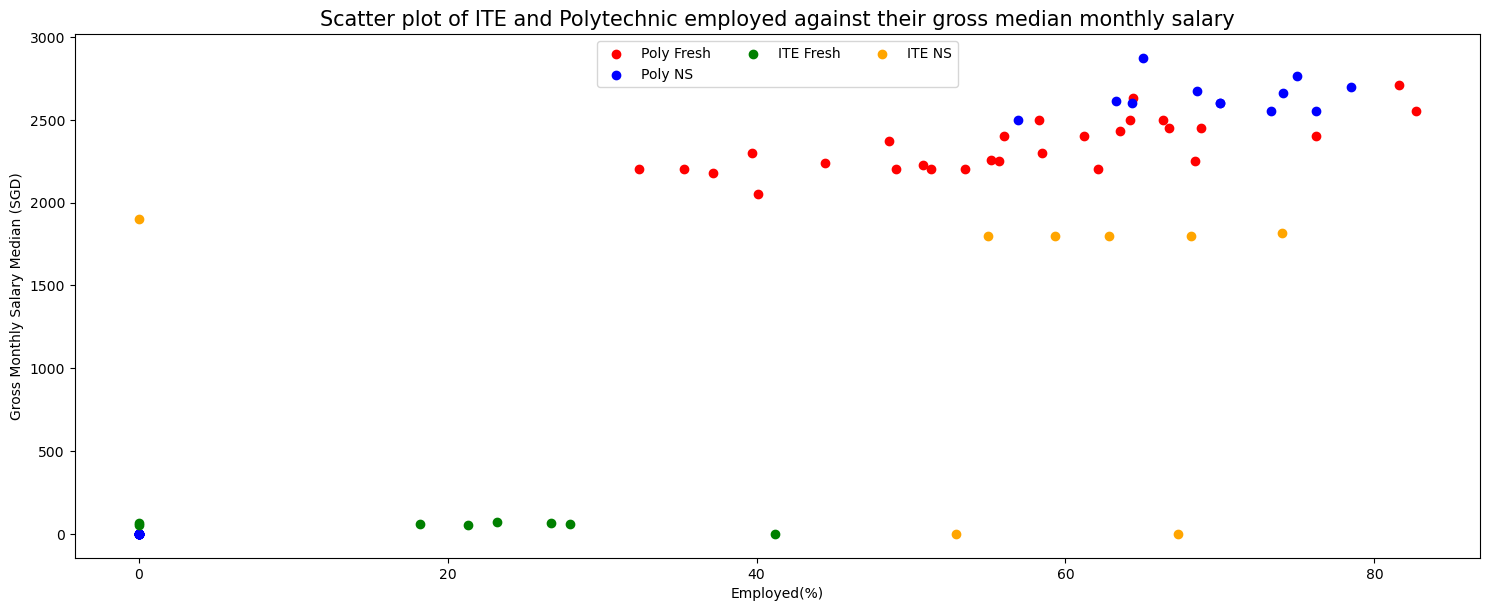

In [12]:
PolyITEconvertToFloat(PolyDF)
PolyITEconvertToFloat(ITEdf)


PolyFreshEmploy = PolyDF['Fresh Graduates Employment Proportion(%)'].values
PolyNSEmploy = PolyDF['Post-NS Graduates Employment Proportion(%)'].values
PolyFreshSalary = PolyDF['Fresh Graduates Median Gross Monthly Starting Salary (SGD)'].values
PolyNSSalary = PolyDF['Post-NS Graduates Median Gross Monthly Starting Salary (SGD)'].values

ITEFreshEmploy = ITEdf['Fresh Graduates Employment Proportion(%)'].values
ITENSEmploy = ITEdf['Post-NS Graduates Employment Proportion(%)'].values
ITEFreshSalary = ITEdf['Fresh Graduates Median Gross Monthly Starting Salary (SGD)'].values
ITENSSalary = ITEdf['Fresh Graduates Median Gross Monthly Starting Salary (SGD)'].values




plt.figure(figsize = (15,6))

plt.scatter(PolyFreshEmploy,PolyFreshSalary,color="red",label="Poly Fresh")
plt.scatter(PolyNSEmploy,PolyNSSalary,color="blue",label="Poly NS")
plt.scatter(ITEFreshEmploy,ITENSEmploy,color="green",label="ITE Fresh")
plt.scatter(ITENSEmploy,ITENSSalary,color="orange",label="ITE NS")
plt.legend(loc ='upper center',bbox_to_anchor=(0.5,1), fancybox= True,ncol = 3)
plt.xlabel("Employed(%)")
plt.ylabel("Gross Monthly Salary Median (SGD)")
plt.tight_layout()

plt.title("Scatter plot of ITE and Polytechnic employed against their gross median monthly salary", fontsize= 15)
plt.show()




To clarify, post-ns means after national service. In Singapore, boys have to attend 2 years of compulsory National service. Most Singaporeans would attend Polytechnic/ITE, serve their national service and then enter university. Hence, Post- Ns poly/ITE means they attend polytechnic/ ITE, serve national service and immediately look for a job

The data used to show polytechnic and ITE gross monthly salary median are people who are without university qualifications. After O levels, the students who did not do as well will attend ITE and then proceed to polytechnic. If they do decently and meet the requirements, they are able to enter polytechnics immediately. As shown, polytechnics graduates, both fresh and post-ns have employment rate at 56% to 63% while ITE graduates, both fresh and post-ns, have employment rate at 23% to about 74%. The monthly gross salary median for polytechnics is at around 2400 to 2600 SGD while for ITE is at around 1800 to 2300 SGD.

# **Conclusion**

Comparing the 2 graphs and data, people who graduated from universities have a higher, more consistent employment ratge with a higher monthly gross salary median as compared to polytechnic and ITE graduates. Using articles from https://www.straitstimes.com/singapore/community/university-grads-median-pay-is-42k-double-the-2k-of-those-with-ite-secondary-education-study, straitstimes, a reliable source of news, it further proves my topic. 

# An introduction to the research space. 

### The report clearly demonstrates students’ ability to:

* #### a. Produce clearly defined aims and objectives for an independent research project.

     The aim of the research is to verify and check if people who graduate from university will be employed easily and have a higher paying job.

* #### b. Acquire a dataset for working with.
    
    I am using 3 different excel files with data that complements each other. The 3 excel files that I am using are:
    * Univeristy_Graduates_Employment_Rate_Monthly_Salary_2021.xlsx
    * Polytechnics_Graduates_Employment_Rate_Monthly_Salary_2021.xlsx
    * ITE_Graduates_Employment_Rate_Monthly_Salary_2021.xlsx

    I then proceed to clean the data in each excel, such as removing spaces, the unwanted text, random numbers in certain columns, convert the data back to percentage and save it as a clean CSV as an appropriate format to be read easily.

* #### c. Utilise the dataset through an exploratory data analysis in Jupyter Notebook.
    
    I used each of the data sets and make comparisons to verify and proof my research topic

* #### d. Write in a way to communicate ideas and concepts clearly.

    I explained each dataset.

* #### e. Present a clear summary of the area of research chosen.

    I have made points and concluded that having a university certification allows you to be employed easily and have a higher pay
    

# Data is relevant to project aims/objectives and use of data source is clearly justified. 

### Data is relevant to the project brief and list of topics. Data source is clearly justified including:

* #### a. Origin of data described clearly including data source and acquisition techniques used.

    Data is taken from https://stats.mom.gov.sg/Pages/Singapore-Yearbook-Of-Manpower-Statistics-2022-Training-and-Higher-Education.aspx, a government website that does parsing of public data given by the Singapore Manpower government for analysis and research purposes. 

* #### b. A good explanation as to why this data source is appropriate for the research question posed.

    The data is appropriate as it shows the employment rate and monthly gross median salary of universities, polytechnics and ITE graduates, 3 typical backgrounds of Singaporeans

* #### c. A clearly identifiable case for working with this specific type of data (e.g. column headings relate to research question.)

    The data is a clear representation as it shows the salary and employment rate. I cleaned and changed the column headers relating to the question for each of the data.

* #### d. Format of data is suitable for analysis (e.g. CSV -> dataframe/numerical analysis.)
    
    The data from the website were originally in excel version which I then proceed to clean and convert it into csv form. The new data which is in CSV format retains the original information and can now be used for analysis.

* #### e. A consideration of at least two other datasets and their potential strengths/weaknesses for your chosen research topic. 
    
    There are 2 unused csv datas taken from https://data.gov.sg.
    
        *(1)graduate-employment-survey-ntu-nus-sit-smu-suss-sutd.csv
        *(2)universities-intake-enrolment-and-graduates-by-course.csv
        
    (1) Originally, I have planned to use this data for my research topic as it also shows the grossly monthly salary median for each university. The benefit of using this data is that it has a wide range of years from 2013 - 2021. However, as this set of data is from data.gov.sg, a reliable government website, the graph shown on the website has already been made, and the csv file is clean and complete. I decided not to use this set of data as is it too clean and I can't do any form of cleaning.
    
    (2) For this set of data, I considered linking the enrolment into universities and tying it to the monthly salary median when they graduate. The benefit is that it will show how difficult it is to enter a university to achieve high employment rate and a higher paying job. However, this set of data alone does not answer the topic question which is to find out if having a university certification will allow us to have a high paying job.

# Project background is clearly defined (e.g. use of literature, research or pre-analysis)

### Should include a summary as to:

* #### a. Why the field is of interest/relevant

    Education is an important part of our society. As such, doing well and graduating from a university shows the intellectual level of individuals and hence recruiters will be willing to pay them more due to their skill level.


* #### b. That the topic has not been previously explored and/or research questions have not already been answered

    This topic will always be explored, however as time goes on, people might value skills over a simple university certification. For example, someone who have experience in coding and self-studied may be paid equal or more even if he does not have a university certification.

* #### c. Scope of work e.g. “I will analyse x and y but not z.”
    
    I have used gross monthly median salary over basic monthly salary mean or grossly monthly salary mean as a median salary reflects the income accuratly due to it reducing inaccurate number distrubtions. I only used median as it allows fair comparison between polytechnic and ITE due to poly and ITE not having other form of salary types.

* #### d. Steps and stages in your analytical data processing pipeline

      Step 1: Find and research on related data

      Step 2: Get data from excel file

      Step 3: Convert the data in csv file for easy readability

      Step 4: Clean by removing unnecessary texts,empty spaces, numbers in degrees columns, add new header column for easier categorisation.

      Step 5: Save the new cleaned data into a new csv which is usable and be used for other researches.
      
      Step 6: Display out the new dataframe and draw informations from it

      Step 7: Display these informations into graphs to view

      Step: Find a conclusion from the graphs

* #### e. A description of how you will evaluate your aims and objectives based on your chosen approach.

    The data I have research should tally with my topic. I find the salary of each universities, polytechnics and ITE graduates and make comparision to see which have a higher median salary.

# Dataset has been explored technically

* #### a. Data set has been processed to remove illegal values, e.g. characters in number fields through regex validation, percentage values over 100 have been removed etc.

    The data originally had certain texts suchs as "H.3 EMPLOYMENT RATES¹ AND GROSS MONTHLY STARTING SALARY OF UNIVERSITY GRADUATES FROM NUS" and the column headers such as "Proportion of Graduates in the Labour Force who were" The data cannot be read properly as these are treated as columns. The columns under proportion of graduates.... are split into 2. Furthermore, there were empty columns and some of the degrees have numbers on them.  As such, i first cleaned the data by converting it into csv, and then remove all of the unnessary informations. I made new columns representing each data. Using a simple regrex, i removed the numbers from the degrees. For the percentages section, I noticed my data become odd and inaccurate if i simply times the value by a 100. Hence, I set the column to be rounded up to 1 d.p. to match with the original data.

* #### b. Data is in the correct format for analysis e.g. numpy nd array, dataframe, with a clear distinction as to why this format is correct and appropriate.

    The dataframes are used to draw graphs.

* #### c. Checks have been done for out of bound values or for numeric and categorical quantities (e.g. finding min, max values, sorting data into logical groups for analysis such as top 10%, bottom 10% etc.) These should be justified in terms of the research question specified.

    The values are in percentages and do not exceed 0 or 100 .

* #### d. Depth of exploration draws out some interesting or valuable insights (e.g. problematic data in higher thresholds, comparing two disparate datasets for accuracy.)

    Despite a smaller sample size for Polytechnics and ITE graduates, it still shows the difference in salary and employment rate between university and Polytechnic/ITE

* #### e. Data is in an appropriate format to carry out further analysis e.g. for a machine learning pipeline or for generating plots, diagrams and charts.

    The datas have been converted from excel to a simple clean csv file where everyone can use it. No spaces, columns match with the data, and jyputer is able to read it well.

# Ethics of use of data have been considered

* #### a. Description of where the data has come from e.g. open or proprietary, licensing and wider considerations around provenance.

    All of the data come from https://stats.mom.gov.sg/Pages/Singapore-Yearbook-Of-Manpower-Statistics-2022-Training-and-Higher-Education.aspx , ministry of manpower, Singapore offical government website. Hence, the data is reliable and accurate.

* #### b. Considerations about usage/reusage of data e.g. does the analysis have the potential to create new forms of intellectual property? How is attribution given?

    The data is publicly sourced information which anybody can access, hence it is free for anybody to analyse. As I only did simple analysis, i believe it does not have any potential of creating intellectual property 

* #### c. Consideration around implications of utilising data for purpose (e.g. is there power to discriminate? Could research summaries produce dangerous or harmful assumptions?)

    The data is sourced from Singapore only and is just an overview with no specific or sensitive information. I believe these data will not cause any form of harm.

* #### d. Considerations of the data processing pipeline. Is the data readily accessible in your notebook? Anonymised? Can it clearly be identified what has been done with the data and that there is no potential for personally identifiable distinctions to be made?

    The data can be easily accessed from the notebook and it does not hold any sensitive or personal information.

* #### e. Any potential biases of the dataset have been considered (e.g. where 80% of the dataset falls into one demographic and 20% for another.)

    The data by itself is  not biased as they are sourced from the Ministry of Manpower.

# Clear rhetoric for modifications to data (e.g. converting between formats, replacing or removing data, combining multiple datasets for improved accuracy)

* #### a) Data is modified

    The columns are modified for easier readiblity by programs. As some of the columns have sub columns, I simply combine them into 2 different columns. An example would be the university: Gross Monthly Salary. It has 4 different sub categories, mean, median, 25th percentile and 75th percentile. I simply combine these 2 into Gross Monthly Salary Mean, Gross Monthly Salary Median, etc... I also added SGD behind it so other countries besides Singapore can view and do their own currency convertion.
    Numbers on degrees are removed so it does not bring any form of misinformation. E.g. Bachelor of Medicine and Bachelor of Surgery6** is changed to simply Bachelor of Medicine and Bachelor of Surgery, the 6** could change the meaning of the degree. 

* #### b) There is a justification that is reasonable for the modifications

    As mentioned above, I talked about the justifcations.
    
* #### c) The modifications add value or utility in some capacity (e.g. descriptive power, performance improvement for analysis.)

    I simply modified the data from a excel file that the program can't read to a simple clean readable csv file.The columns and data now match and this allows anyone to simply take the csv and do their own form of research

* #### d) Data has been changed in a systematic and rigorous (not arbitrary) way.
    
    I did not make any changes to the original data, the csv file still displays the same data and numerical data as the original.

* #### e) Changes to data utilise advanced techniques for example by comparing a static CSV dataset against some web scraped data to compare accuracy.

    Unfortunately, I only compared the csvs data with each other

# Code is clean (not verbose) 

### Examples of clean code might include:

* #### a. using functions where repetition of processes are necessary or using lambda functions where they are not.
   
    I have functions for each repetition process. E.g. the same cleaning of data on the university has to be done 5 times due to it having 5 different university school. As it has the same format for each sheets, i created a function to repeat the process instead of a whole chunk of code

* #### b. Commenting is done in line or markdown is used to separate elements.

    Every code is commented with the logic explained behindi t

* #### c. LaTeX, images, markdown and such are used to improve clarity of expressions and ideas.

    Markdown is used to explain and represent data


# Code is functional (ie free of errors, reproducibility of results)

### Code should:

* #### a. Be reproducible in the current notebook format.
    
    The code should be reproducible as I only used python.

* #### b. Use proper conventions e.g. relative path vs absolute.

    The data is within the same folder.

* #### c. Be explained or described where libraries are used in relation to their utility/ability to solve a particular problem in an efficient manner.

    Pandas library is used to read from the excel and convert it into csv. It is also used to create/filter the data frames. The matplotlib.pyplot library functions are used to plot graphs

* #### d. Runs without performance issues e.g. long wait times for web scraping tasks (hint: pickle your data!)

    It runs without performance issues as I am not working with a huge amount of data

* #### e. Handle errors in appropriate places (e.g. for web requests – catching 404s.)

    No error handlers as my data are static

In [13]:
# vaccAgeGrp = csvDataFrame("vaccination-status-by-age-group.csv")

# vaccStatus = vaccAgeGrp['age'].values
# x = np.arange (len(vaccStatus)) 
# plt.figure(figsize = (20,10))
# w = 0.3
# plt.bar(x-w, vaccAgeGrp['no_minimum_protection'].values, w, label = "No Minimum Protection")
# plt.bar(x, vaccAgeGrp['minimum_protection'].values, w, label = "Minimum Protection")
# plt.bar(x+w, vaccAgeGrp['up-to-date_vaccination'].values,w,align='center', label = "Up to date Vaccination")
# plt.xticks(x,vaccStatus)
# plt.xlabel("Age Group")
# plt.ylabel("Vaccination in percentage")
# plt.tight_layout()
# plt.legend(loc ='upper center',bbox_to_anchor=(0.5,1), fancybox= True,ncol = 3)

# plt.show()






